Импортируем библиотеку

In [1]:
%%time
from TSEnsemble import utils, nn, arima

CPU times: total: 3.98 s
Wall time: 4.37 s


Преобразуем .csv файл в DataFrame, состоящий из 1 столбца со значениями <br> временного ряда (column) и индекса, содержащего даты (index).

In [2]:
%%time
path = "TestScripts\\datasets\\GlobalTemperatures.csv"
dataset = utils.ts_from_csv(path, column = 1, index = 0)


CPU times: total: 0 ns
Wall time: 14 ms


Декомпозируем временной ряд на составляющие: тренд, сезонность, остатки.

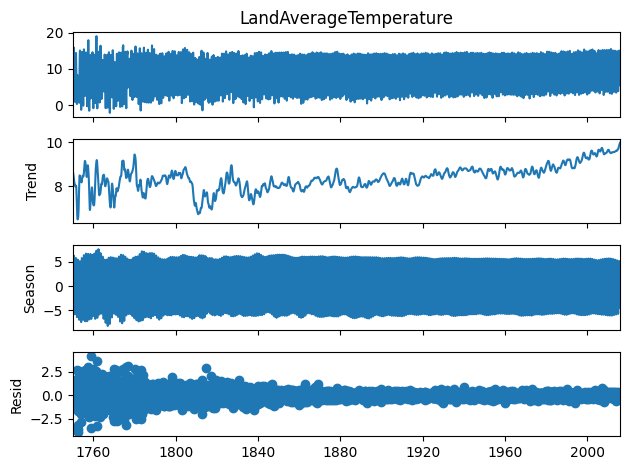

CPU times: total: 1.12 s
Wall time: 1.15 s


In [3]:
%%time
utils.plot_decompose(path, period = 12)

Строим функцию автокорелляции для временного ряда, по ней можно увидеть сезонность ряда.

CPU times: total: 62.5 ms
Wall time: 38 ms


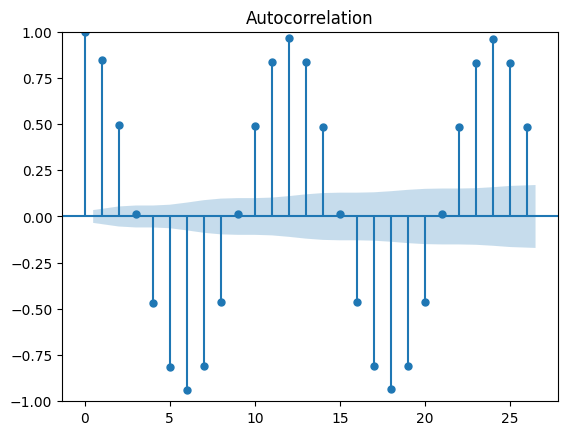

In [4]:
%%time
from statsmodels.graphics.tsaplots import plot_acf
utils.plot_acf(path, lags = 26)

Проверим ряд на стационарность, используя 2 теста: KPSS и ADF. <br> Также нарисуем график временного ряда, средних значений и стандартных<br> отклонений прошлых window значений (по умолчанию 2% датасета)

ADF test: 
 stat        -4.036404
pval         0.001231
lags        28.000000
numobs    3163.000000
1%          -3.432419
5%          -2.862454
10%         -2.567257
dtype: float64
KPSS test:  stat      1.409546
pval      0.010000
lags    149.000000
10%       0.347000
5%        0.463000
2.5%      0.574000
1%        0.739000
dtype: float64
CPU times: total: 359 ms
Wall time: 202 ms


C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:172: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_kpss = kpss(ts)


False

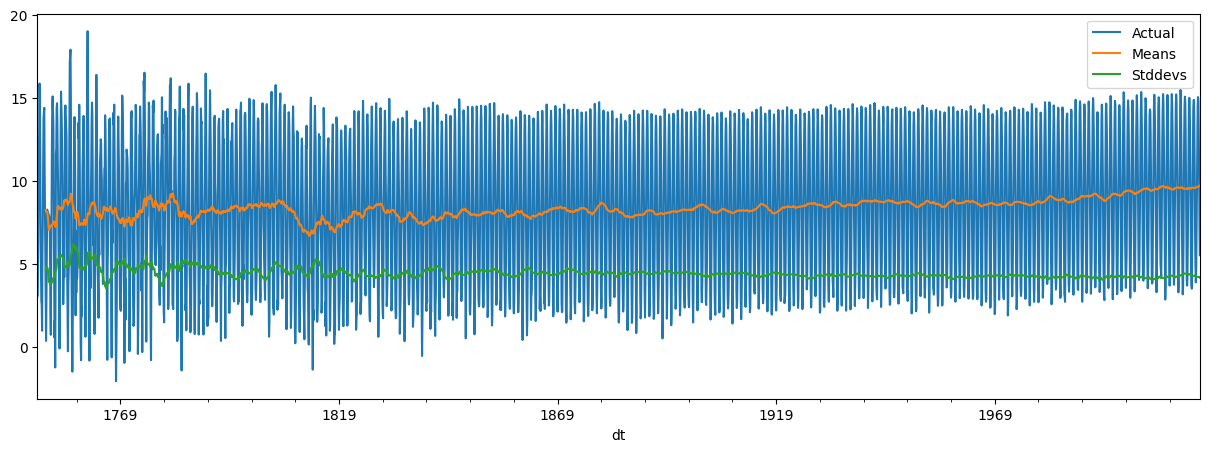

In [5]:
%%time
utils.isStationary(path, window = 24, plot = True)

Автоматически найдем наиболее оптимальные коэффициенты для SARIMA <br> модели по критерию AIC и построим модель.

C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:250: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_kpss = kpss(ts)
C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\TSEnsemble\utils.py:250: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  test_kpss = kpss(ts)


SARIMA[2, 1, 2] [1, 1, 1, 12] AIC:inf  Time_Taken:15.141
SARIMA[0, 1, 0] [0, 1, 0, 12] AIC:10102.140  Time_Taken:0.125
SARIMA[1, 1, 0] [1, 1, 0, 12] AIC:8882.128  Time_Taken:0.547
SARIMA[0, 1, 1] [0, 1, 1, 12] AIC:inf  Time_Taken:1.953
SARIMA[0, 1, 0] [1, 1, 0, 12] AIC:9272.559  Time_Taken:0.391
SARIMA[1, 1, 0] [0, 1, 0, 12] AIC:9669.414  Time_Taken:0.125
SARIMA[2, 1, 0] [1, 1, 0, 12] AIC:8767.364  Time_Taken:0.812
SARIMA[1, 1, 0] [1, 1, 0, 12] AIC:8882.128  Time_Taken:0.531
SARIMA[2, 1, 0] [0, 1, 0, 12] AIC:9564.930  Time_Taken:0.172
SARIMA[3, 1, 0] [1, 1, 0, 12] AIC:8696.185  Time_Taken:0.891
SARIMA[3, 1, 0] [0, 1, 0, 12] AIC:9506.098  Time_Taken:0.234
SARIMA[3, 1, 1] [1, 1, 0, 12] AIC:inf  Time_Taken:9.500
SARIMA[3, 1, 0] [2, 1, 0, 12] AIC:8451.195  Time_Taken:1.734
SARIMA[2, 1, 0] [2, 1, 0, 12] AIC:8519.633  Time_Taken:1.797
SARIMA[3, 1, 1] [2, 1, 0, 12] AIC:inf  Time_Taken:36.375
SARIMA[3, 1, 0] [3, 1, 0, 12] AIC:8250.504  Time_Taken:3.734
SARIMA[2, 1, 0] [3, 1, 0, 12] AIC:8322.14

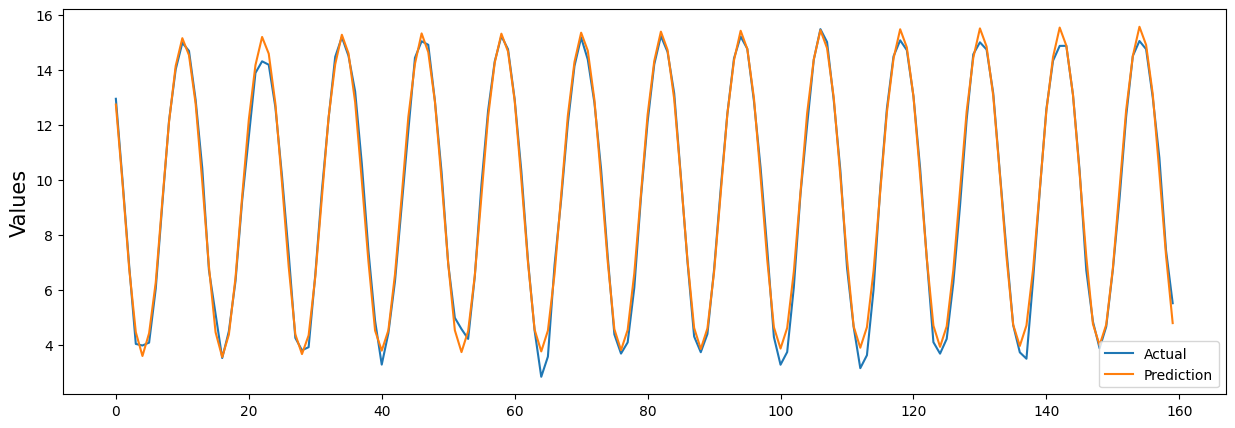

     prediction  actual
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
RMSE = 0.3516623745329281, MSE = 0.1236664256621374, MAE = 0.26352182083441456, MAPE = 0.042117482796404405
CPU times: total: 3min 46s
Wall time: 2min 38s


In [6]:
%%time
ar = arima.auto_arima(dataset,
                            method = 'stepwise',
                            season = 12,
                            max_p = 3,
                            max_q = 3,
                            max_Q = 3,
                            max_P = 3,
                            train_split = 0.95,
                            plot = True)

Построим CNN, LSTM, GRU, Transformer модели, пытаясь подобрать оптимальные параметры. 

5/5 [==============================] - 0s 1ms/step


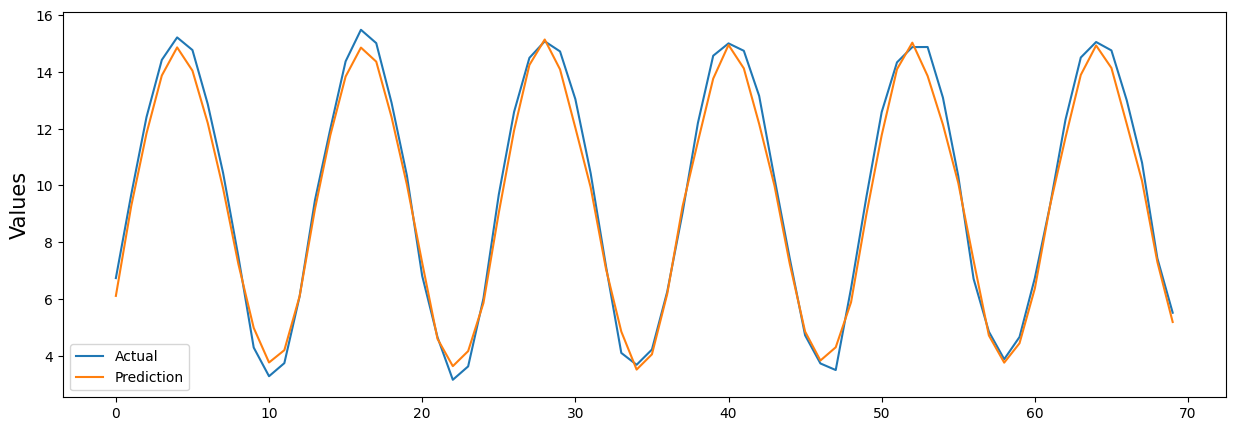

     prediction  actual
0     12.149379  12.911
1      9.877851  10.424
2      7.345591   6.727
3      4.730360   5.133
4      3.843074   3.525
..          ...     ...
143   14.137775  14.755
144   12.164734  12.999
145   10.154995  10.801
146    7.306258   7.433
147    5.191300   5.518

[148 rows x 2 columns]
RMSE = 0.5122272537482644, MSE = 0.2623767594824888, MAE = 0.43251515222937414, MAPE = 0.05418719611401738
CPU times: total: 5.36 s
Wall time: 4.45 s


In [7]:
%%time
cnn = nn.make_cnn(dataset,
                  look_back = 12,
                  hidden_layers = 1,
                  train_size = 0.95,
                  kernel_size = 2,
                  filters = 12,
                    epochs = 50,
                  batch_size = 64,
                  dilation_rate = 1,
                  dilation_mode = "additive")

5/5 [==============================] - 0s 2ms/step


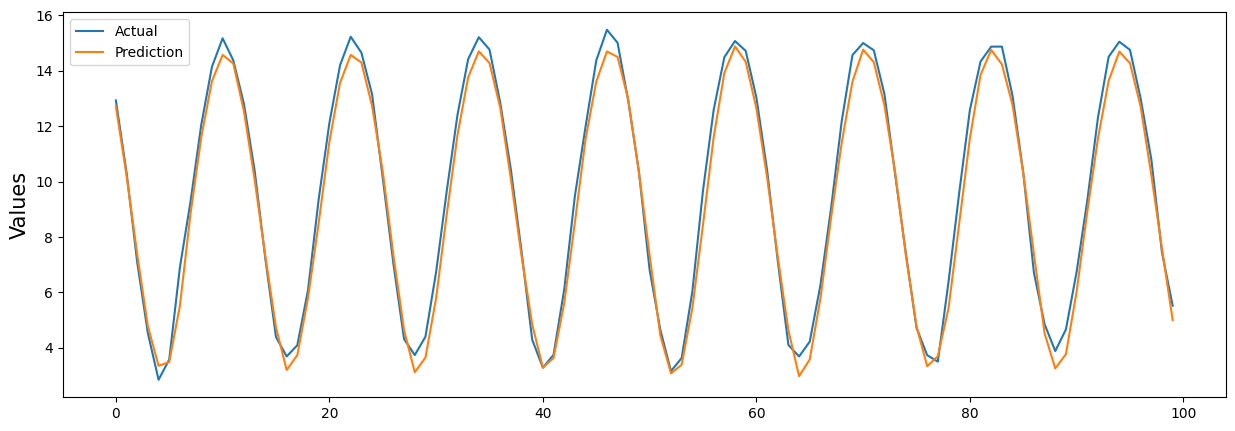

     prediction  actual
0     12.650519  12.911
1     10.198710  10.424
2      7.422891   6.727
3      4.596901   5.133
4      3.450284   3.525
..          ...     ...
143   14.273006  14.755
144   12.704264  12.999
145   10.232183  10.801
146    7.571732   7.433
147    4.994514   5.518

[148 rows x 2 columns]
RMSE = 0.5605127354430736, MSE = 0.314174526593877, MAE = 0.47233773679296337, MAPE = 0.0603472502416931
CPU times: total: 41.5 s
Wall time: 18.7 s


In [8]:
%%time
lstm = nn.make_rnn(dataset,
                  look_back = 12,
                  units = 64,
                  hidden_layers = 1,
                  train_size = 0.95,
                  type = "LSTM",
                  epochs = 20,
                  batch_size = 16,
                  dropout = 0.0,
                  maxPlot = 100)

5/5 [==============================] - 0s 2ms/step


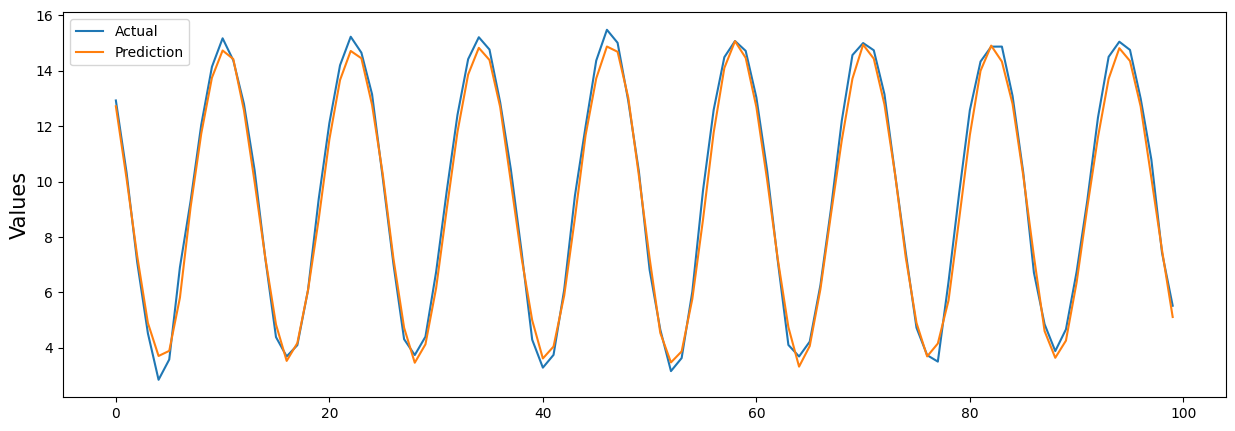

     prediction  actual
0     12.704336  12.911
1     10.110059  10.424
2      7.337024   6.727
3      4.661689   5.133
4      3.820265   3.525
..          ...     ...
143   14.354935  14.755
144   12.714123  12.999
145   10.134203  10.801
146    7.527487   7.433
147    5.110621   5.518

[148 rows x 2 columns]
RMSE = 0.4611823654350509, MSE = 0.21268917418826885, MAE = 0.3859517565772217, MAPE = 0.05051716571649687
CPU times: total: 37.3 s
Wall time: 17.7 s


In [9]:
%%time
gru = nn.make_rnn(dataset,
                  look_back = 12,
                  hidden_layers = 1,
                  units = 64,
                  train_size = 0.95,
                  type = "GRU",
                  dropout = 0.0,
                  maxPlot = 100)

5/5 [==============================] - 0s 23ms/step


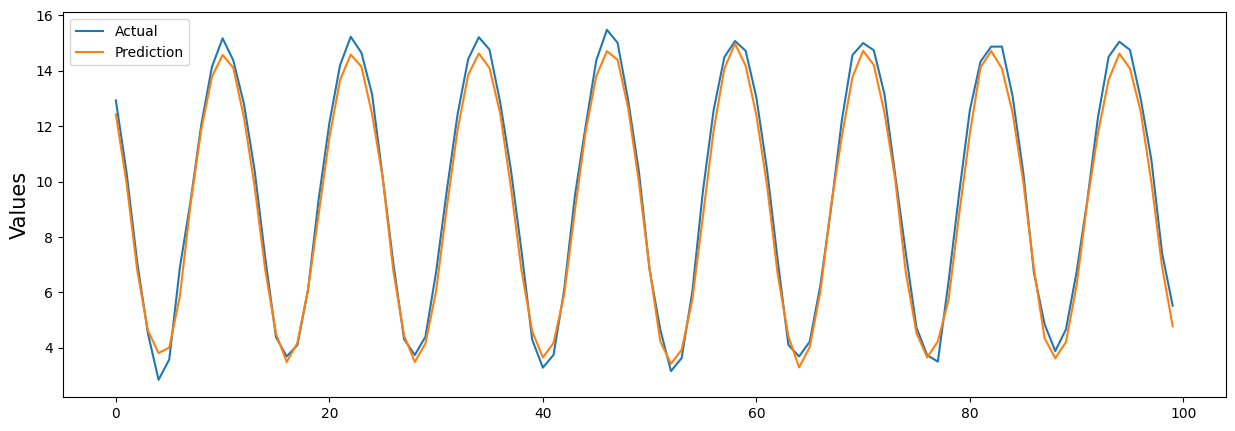

     prediction  actual
0     12.413152  12.911
1      9.962452  10.424
2      6.814686   6.727
3      4.343928   5.133
4      3.816258   3.525
..          ...     ...
143   14.081531  14.755
144   12.539993  12.999
145    9.986661  10.801
146    6.940286   7.433
147    4.775481   5.518

[148 rows x 2 columns]
RMSE = 0.5147307275411422, MSE = 0.26494772187503357, MAE = 0.45230320951299197, MAPE = 0.05636755115215218
CPU times: total: 13min 18s
Wall time: 2min 59s


In [10]:
%%time
transformer = nn.make_transformer(dataset, 
                    look_back = 12, 
                    train_size = 0.95,
                    maxPlot = 100, 
                    batch_size = 32,
                    epochs = 30,
                    verbose = 0,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

Построим acl модель, используя параметры для моделей, подобранные ранее.

AIC:  8250.504306275288
5/5 [==============================] - 1s 19ms/step


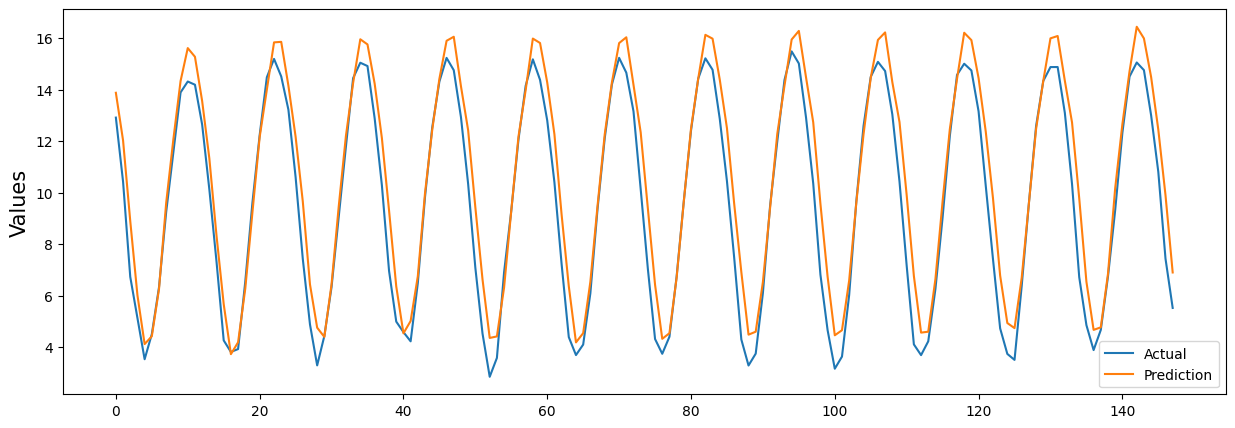

     prediction  actual
0     13.874816  12.911
1     12.025314  10.424
2      8.894189   6.727
3      6.013009   5.133
4      4.113795   3.525
..          ...     ...
143   15.985909  14.755
144   14.486409  12.999
145   12.440238  10.801
146    9.895510   7.433
147    6.895193   5.518

[148 rows x 2 columns]
RMSE = 1.2746288975268845, MSE = 1.6246788264106007, MAE = 1.0047900978290647, MAPE = 0.14024854152463198
CPU times: total: 11min 54s
Wall time: 3min 49s


In [11]:
%%time
acl = nn.ACL()
acl = acl.fit(dataset,
              order = (3, 1, 0), 
              seasonal_order = (3, 1, 0, 12), 
              look_back = 12,
              train_size= 0.95, 
              filters = 64, 
              cnn_layers = 3, 
              dilation_mode = "multiplicative", 
              lstm_layers = 1,
              units = 64, 
              kernel_size = 2, 
              epochs = 20)


Сгенерируем ненатреннированные модели с уже подобранными параметрами,<br> и создаздим ансамблевую модель, которая будет работать по принципу <br> взвешенного среднего, основываясь на оценке ошибки MAPE.

C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Viktor\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


     prediction       1
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 1ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.4205054264369519 

5/5 [==============================] - 0s 3ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3691593522851332 

5/5 [==============================] - 0s 27ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.38928617038034735 



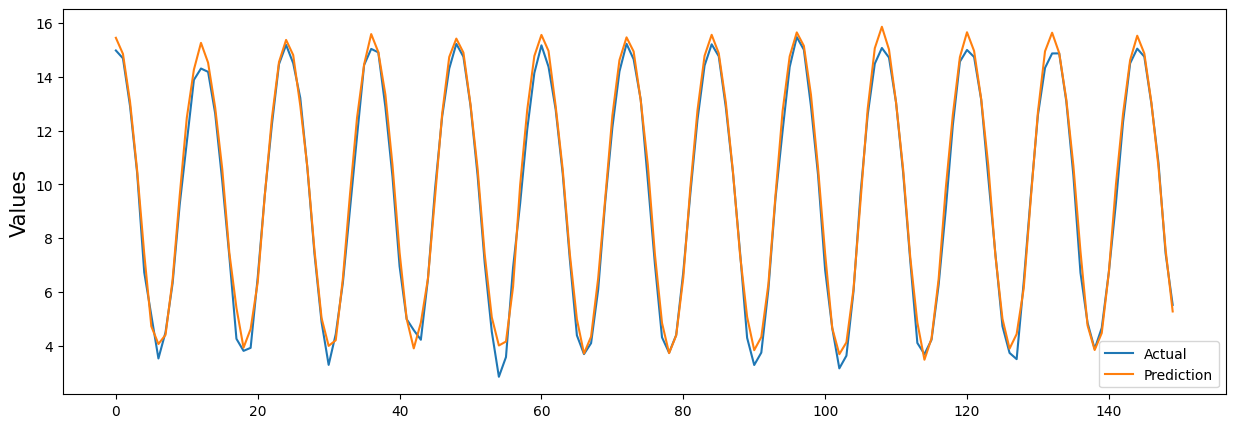

     prediction  actual
0     13.017785  12.950
1     10.569361   9.988
2      7.374818   6.892
3      4.912794   4.038
4      3.808032   3.981
..          ...     ...
155   14.873270  14.755
156   13.040067  12.999
157   10.646660  10.801
158    7.576456   7.433
159    5.274104   5.518

[160 rows x 2 columns]
RMSE = 0.4301502726978271, MSE = 0.185029257102015, MAE = 0.34220597457602625, MAPE = 0.04963419617820903
CPU times: total: 6min 10s
Wall time: 2min 17s


0.4301502726978271

In [11]:
%%time
from statsmodels.tsa.arima.model import ARIMA
ar = ARIMA(dataset, order = (3, 1, 0), seasonal_order = (3, 1, 0, 12))

transformer = nn.generate_transformer(
                    look_back = 12,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)

lstm = nn.generate_rnn(look_back = 12,
                    hidden_layers = 1,
                    units = 64,
                    type = "LSTM",
                    dropout = 0.0)

cnn = nn.generate_cnn(look_back = 12,
                hidden_layers = 3,
                kernel_size = 2,
                filters = 64,
                dilation_rate = 1,
                dilation_mode = "multiplicative")
from TSEnsemble.ensemble import Ensemble
ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer], regressor = 'lr')
ensemble_model.fit(dataset, 
                   train_size = 0.9505, 
                   look_back = 12, 
                   val_size = 0.2, 
                   train_models_size = 0.7, 
                   epochs = 20, 
                   batch_size = 16, 
                   metric = "rmse")
ensemble_model.eval(get="rmse")


     prediction       1
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 2ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.41960142989163957 

5/5 [==============================] - 0s 2ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3685821608816821 

5/5 [==============================] - 0s 26ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.3881990159826481 



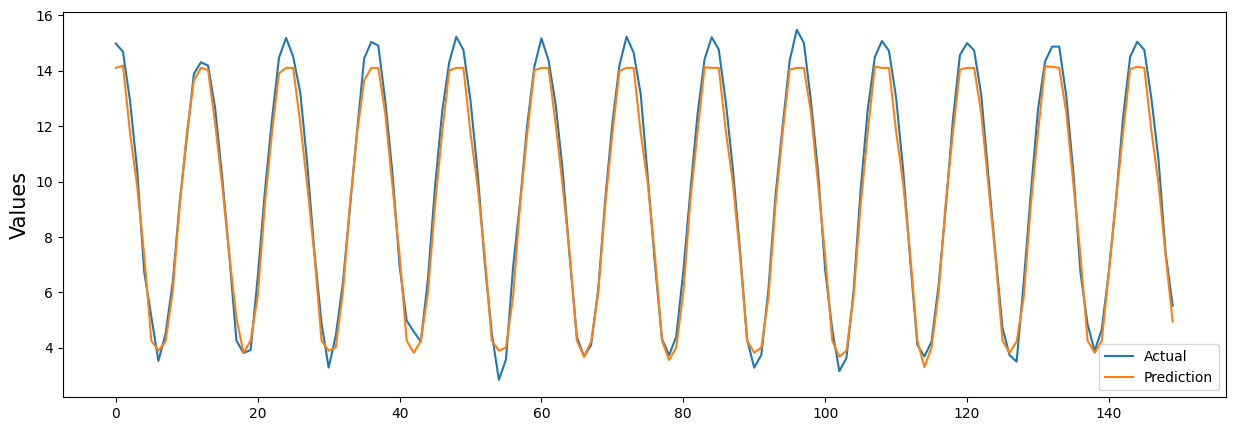

     prediction  actual
0     11.755548  12.950
1      9.832934   9.988
2      7.326584   6.892
3      4.255303   4.038
4      3.702822   3.981
..          ...     ...
155   14.105974  14.755
156   11.826192  12.999
157    9.924080  10.801
158    7.326584   7.433
159    4.946242   5.518

[160 rows x 2 columns]
RMSE = 0.5835544383054805, MSE = 0.3405357824660248, MAE = 0.4823163622127148, MAPE = 0.05719509307020423
CPU times: total: 14.1 s
Wall time: 11.4 s


0.5835544383054805

In [12]:
%%time

ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer],
                          regressor = 'catboost',
                          regr_params ={'iterations': 20,                         
                                        'task_type' : "GPU",
                                        'devices' : '0:1',
                                        'depth': 10,
                                       'verbose': 0}
                         )
ensemble_model.fit(dataset, fit_models = False, train_size = 0.9505, look_back = 12, val_size = 0.2, train_models_size = 0.8, epochs = 20, batch_size = 16, metric = "rmse")
ensemble_model.eval(get="rmse")

     prediction       1
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 2ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.41960142989163957 

5/5 [==============================] - 0s 3ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3685821608816821 

5/5 [==============================] - 0s 43ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.3881990159826481 



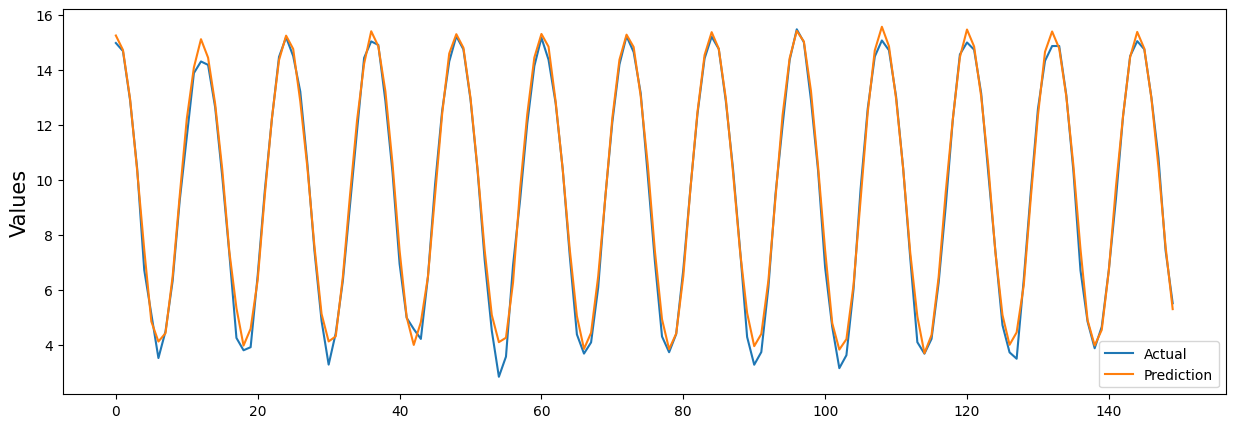

     prediction  actual
0     12.981473  12.950
1     10.384792   9.988
2      7.359250   6.892
3      4.898694   4.038
4      3.864850   3.981
..          ...     ...
155   14.776774  14.755
156   12.973301  12.999
157   10.452137  10.801
158    7.574231   7.433
159    5.304367   5.518

[160 rows x 2 columns]
RMSE = 0.3752405512754186, MSE = 0.14080547132148005, MAE = 0.28047363394347996, MAPE = 0.04654569080253148
CPU times: total: 13.8 s
Wall time: 10.8 s


0.3752405512754186

In [13]:
%%time

ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer], regressor = 'wmean')
ensemble_model.fit(dataset, fit_models = False, train_size = 0.9505, look_back = 12, val_size = 0.2, train_models_size = 0.8, epochs = 20, batch_size = 16, metric = "rmse")
ensemble_model.eval(get="rmse")

     prediction       1
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 1ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.41960142989163957 

5/5 [==============================] - 0s 2ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3685821608816821 

5/5 [==============================] - 0s 28ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.3881990159826481 



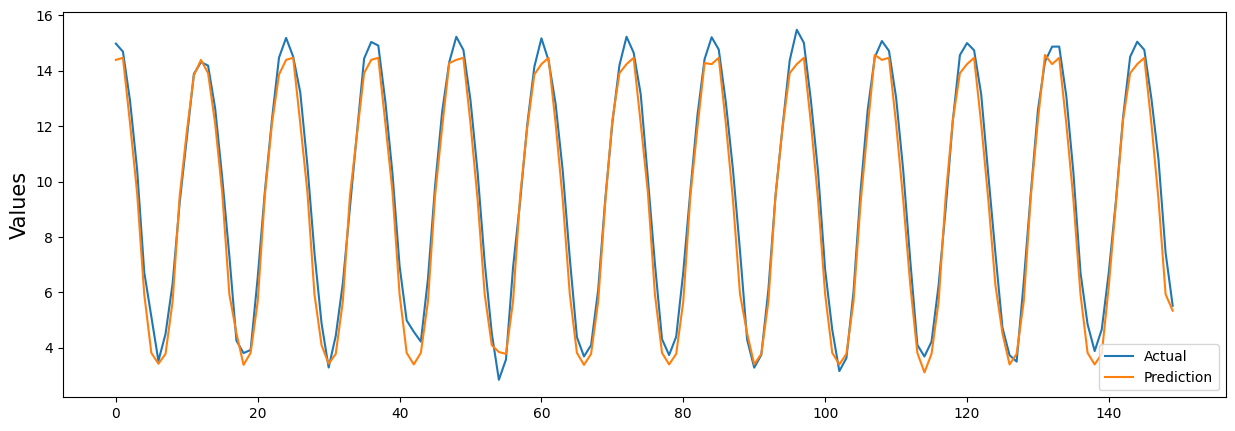

     prediction  actual
0       12.0960  12.950
1        9.5795   9.988
2        5.9310   6.892
3        3.8170   4.038
4        3.3830   3.981
..          ...     ...
155     14.4705  14.755
156     12.0960  12.999
157      9.3515  10.801
158      5.9310   7.433
159      5.3395   5.518

[160 rows x 2 columns]
RMSE = 0.6887616843382768, MSE = 0.47439265781250006, MAE = 0.574690625, MAPE = 0.07468542538669315
CPU times: total: 13.3 s
Wall time: 10.6 s


0.6887616843382768

In [14]:
%%time

ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer], regressor = 'knn', regr_params = {'n_neighbors': 2})
ensemble_model.fit(dataset, fit_models = False, train_size = 0.9505, look_back = 12, val_size = 0.2, train_models_size = 0.8, epochs = 20, batch_size = 16, metric = "rmse")
ensemble_model.eval(get="rmse")

     prediction       1
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 2ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.41960142989163957 

5/5 [==============================] - 0s 3ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3685821608816821 

5/5 [==============================] - 0s 28ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.3881990159826481 



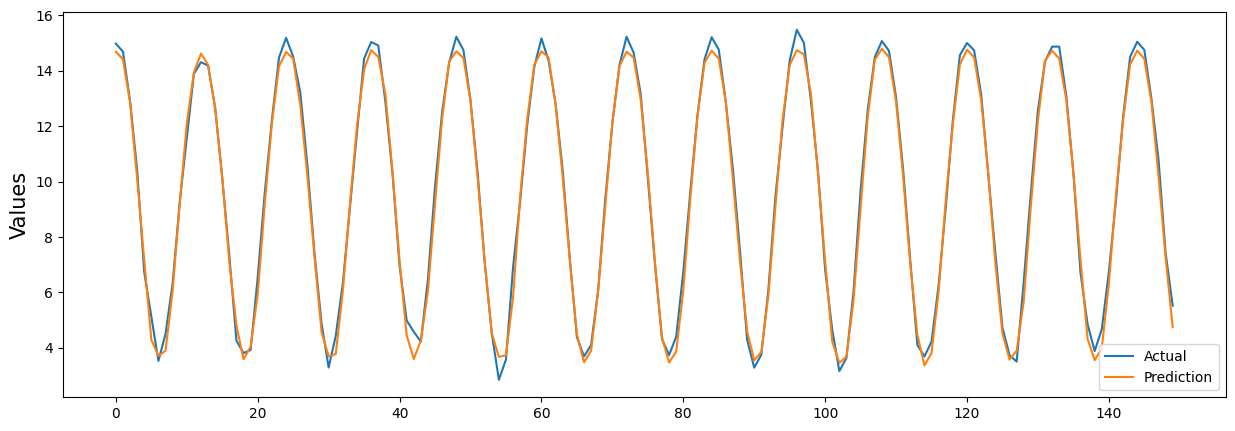

     prediction  actual
0     12.898649  12.950
1     10.145740   9.988
2      7.047747   6.892
3      4.334116   4.038
4      3.509942   3.981
..          ...     ...
155   14.431584  14.755
156   12.879092  12.999
157   10.214965  10.801
158    7.277857   7.433
159    4.744131   5.518

[160 rows x 2 columns]
RMSE = 0.3479646762838206, MSE = 0.12107941594130409, MAE = 0.2793599627936749, MAPE = 0.04039727175356781
CPU times: total: 12.8 s
Wall time: 10.5 s


0.3479646762838206

In [15]:
%%time

ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer], regressor = 'svr', regr_params = {'C': 1.0,
                          'epsilon': 0.2})
ensemble_model.fit(dataset, fit_models = False, train_size = 0.9505, look_back = 12, val_size = 0.2, train_models_size = 0.8, epochs = 20, batch_size = 16, metric = "rmse")
ensemble_model.eval(get="rmse")

     prediction       1
0     12.740215  12.950
1      9.892806   9.988
2      6.781601   6.892
3      4.465869   4.038
4      3.599770   3.981
..          ...     ...
155   14.909026  14.755
156   13.119663  12.999
157   10.259375  10.801
158    7.248030   7.433
159    4.795211   5.518

[160 rows x 2 columns]
model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.35166237453292815 

5/5 [==============================] - 0s 1ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.41960142989163957 

5/5 [==============================] - 0s 2ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3685821608816821 

5/5 [==============================] - 0s 25ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.3881990159826481 

Learning rate set to 0.090861
0:	learn: 3.7906965	test: 3.8208870	best: 3.8208870 (0)	total: 7.43ms	remaining: 1.48s
1:	learn: 3.4759800	test: 3.6635412	best: 3.6635412 (1)	total: 14.

87:	learn: 0.2340913	test: 0.6881973	best: 0.6881726 (85)	total: 596ms	remaining: 759ms
88:	learn: 0.2335798	test: 0.6879662	best: 0.6879662 (88)	total: 607ms	remaining: 757ms
89:	learn: 0.2326526	test: 0.6877578	best: 0.6877578 (89)	total: 614ms	remaining: 750ms
90:	learn: 0.2321999	test: 0.6867604	best: 0.6867604 (90)	total: 620ms	remaining: 743ms
91:	learn: 0.2314493	test: 0.6866459	best: 0.6866459 (91)	total: 626ms	remaining: 735ms
92:	learn: 0.2307263	test: 0.6867085	best: 0.6866459 (91)	total: 633ms	remaining: 728ms
93:	learn: 0.2299446	test: 0.6865184	best: 0.6865184 (93)	total: 639ms	remaining: 721ms
94:	learn: 0.2294554	test: 0.6855847	best: 0.6855847 (94)	total: 646ms	remaining: 714ms
95:	learn: 0.2287120	test: 0.6841820	best: 0.6841820 (95)	total: 652ms	remaining: 706ms
96:	learn: 0.2277937	test: 0.6841139	best: 0.6841139 (96)	total: 658ms	remaining: 699ms
97:	learn: 0.2270502	test: 0.6840929	best: 0.6840929 (97)	total: 665ms	remaining: 692ms
98:	learn: 0.2263598	test: 0.683

179:	learn: 0.1793609	test: 0.6860540	best: 0.6828060 (102)	total: 1.2s	remaining: 134ms
180:	learn: 0.1789672	test: 0.6860903	best: 0.6828060 (102)	total: 1.21s	remaining: 127ms
181:	learn: 0.1786190	test: 0.6858873	best: 0.6828060 (102)	total: 1.22s	remaining: 120ms
182:	learn: 0.1782586	test: 0.6860991	best: 0.6828060 (102)	total: 1.22s	remaining: 114ms
183:	learn: 0.1777583	test: 0.6859103	best: 0.6828060 (102)	total: 1.23s	remaining: 107ms
184:	learn: 0.1770352	test: 0.6863663	best: 0.6828060 (102)	total: 1.24s	remaining: 100ms
185:	learn: 0.1762956	test: 0.6860384	best: 0.6828060 (102)	total: 1.24s	remaining: 93.5ms
186:	learn: 0.1758629	test: 0.6861068	best: 0.6828060 (102)	total: 1.25s	remaining: 86.9ms
187:	learn: 0.1754595	test: 0.6861898	best: 0.6828060 (102)	total: 1.25s	remaining: 80.1ms
188:	learn: 0.1751042	test: 0.6852343	best: 0.6828060 (102)	total: 1.26s	remaining: 73.4ms
189:	learn: 0.1748037	test: 0.6852703	best: 0.6828060 (102)	total: 1.27s	remaining: 66.7ms
190:	l

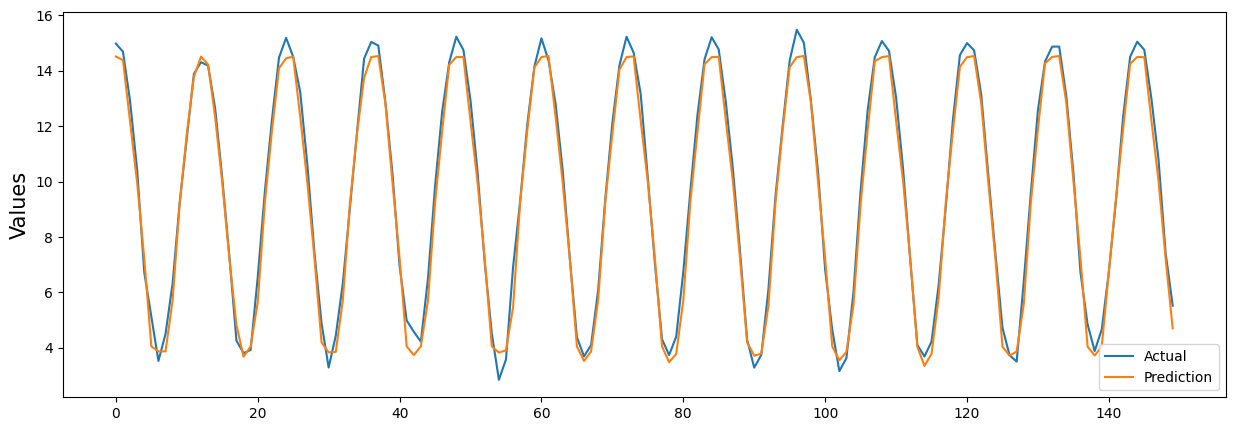

     prediction  actual
0     12.184280  12.950
1      9.958843   9.988
2      7.224935   6.892
3      4.049021   4.038
4      3.654414   3.981
..          ...     ...
155   14.491873  14.755
156   12.207186  12.999
157   10.037747  10.801
158    7.230463   7.433
159    4.699695   5.518

[160 rows x 2 columns]
RMSE = 0.4834340937076086, MSE = 0.23370852295889688, MAE = 0.3960165775763881, MAPE = 0.05324948133586334


0.4834340937076086

In [16]:
ensemble_model = Ensemble(models = [ar, cnn, lstm, transformer],
                          regressor = 'catboost',
                          regr_params ={'iterations': 200,                         
                                        'task_type' : "GPU",
                                        'devices' : '0:1',
                                        'depth': 10}
                         )
ensemble_model.fit(dataset, fit_models = False, train_size = 0.9505, look_back = 12, val_size = 0.2, train_models_size = 0.8, epochs = 20, batch_size = 16, metric = "rmse")
ensemble_model.eval(get="rmse")

model 0 : <class 'statsmodels.tsa.arima.model.ARIMAResultsWrapper'>, rmse = 0.5003963440169422 

6/6 [==============================] - 0s 2ms/step
model 1 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.3186140893504168 

6/6 [==============================] - 0s 2ms/step
model 2 : <class 'keras.engine.sequential.Sequential'>, rmse = 0.33838424588352894 

6/6 [==============================] - 0s 21ms/step
model 3 : <class 'keras.engine.functional.Functional'>, rmse = 0.46480200682307804 



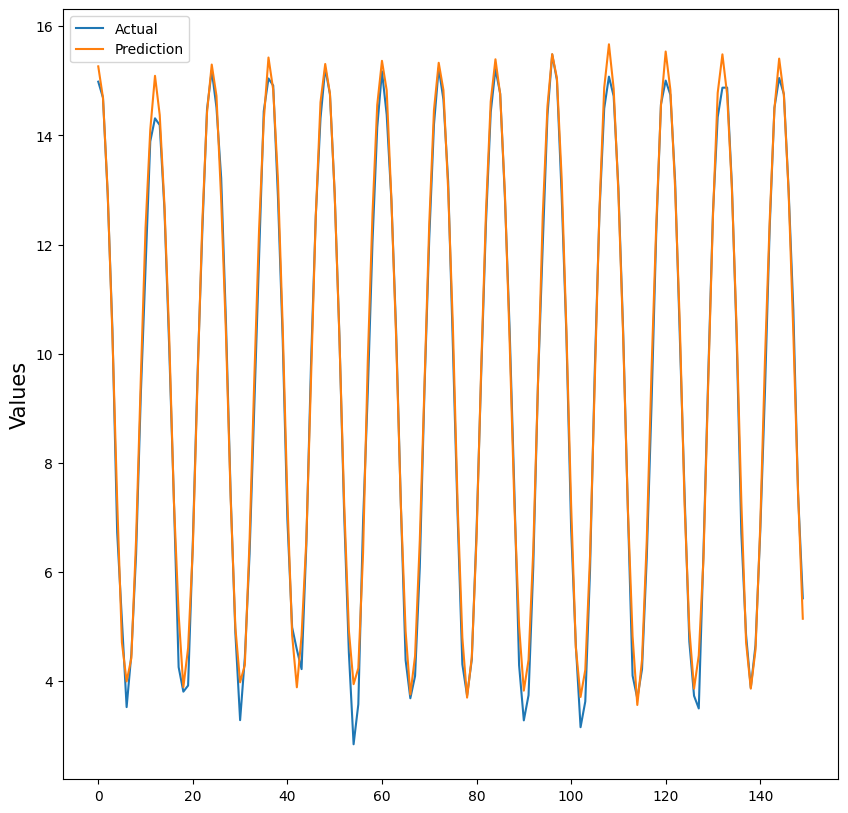

     prediction  actual
0     14.796259  14.560
1     12.872903  12.950
2     10.302655   9.988
3      7.168596   6.892
4      4.804625   4.038
..          ...     ...
156   14.732538  14.755
157   12.960722  12.999
158   10.374619  10.801
159    7.448648   7.433
160    5.143746   5.518

[161 rows x 2 columns]
RMSE = 0.36002770485737123, MSE = 0.12961994826486642, MAE = 0.27449661051436586, MAPE = 0.043541910903192434
CPU times: total: 6min 6s
Wall time: 2min 12s


0.36002770485737123

In [24]:
%%time
from statsmodels.tsa.arima.model import ARIMA
ar = ARIMA(dataset, order = (3, 1, 0), seasonal_order = (3, 1, 0, 12))
transformer = nn.generate_transformer(
                    look_back = 12,
                    horizon = 1,
                    n_features = 1,
                    num_transformer_blocks = 4,
                    dropout = 0.25, 
                    head_size = 256, 
                    num_heads = 4, 
                    ff_dim = 4,
                    mlp_units=[128],
                    mlp_dropout=0.4)


gru = nn.generate_rnn(
                  look_back = 12,
                  hidden_layers = 1,
                  units = 64,
                  type = "GRU",
                  dropout = 0.0)

cnn = nn.generate_cnn(look_back = 12,
                hidden_layers = 3,
                kernel_size = 2,
                filters = 64,
                dilation_rate = 1,
                dilation_mode = "multiplicative")

ensemble_model1 = Ensemble(models = [ar, cnn, gru, transformer], regressor = 'wmean')
ensemble_model1.fit(dataset, train_size = 0.95, look_back = 12, val_size = 0.2, train_models_size = 0.7, epochs = 20, batch_size = 16, metric = "rmse")
ensemble_model1.eval(get="rmse")

Также построим CNN LSTM модель.

5/5 [==============================] - 0s 2ms/step


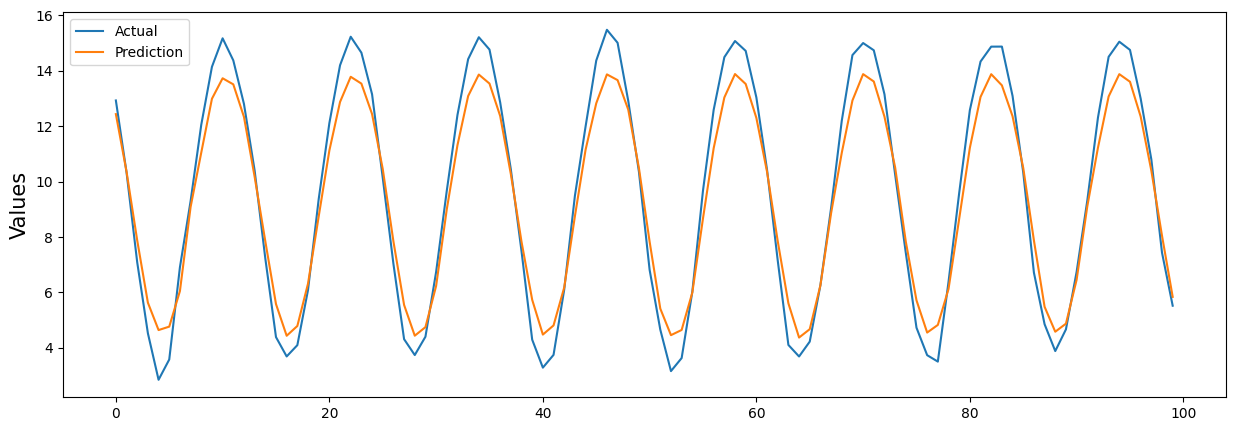

     prediction  actual
0     12.352341  12.911
1     10.314637  10.424
2      7.899449   6.727
3      5.441472   5.133
4      4.631914   3.525
..          ...     ...
143   13.605193  14.755
144   12.348840  12.999
145   10.396079  10.801
146    8.044506   7.433
147    5.837587   5.518

[148 rows x 2 columns]
RMSE = 0.9241304044709721, MSE = 0.8540170044676824, MAE = 0.8062804086832712, MAPE = 0.10622524058947691
CPU times: total: 43.3 s
Wall time: 19.8 s


In [16]:
%%time
seq = nn.make_seq_model(dataset, 
            layers = ["cnn", "lstm"], 
            look_back = 12, 
            units = 64,
            filters = 64,
            horizon = 1, 
            dropout = 0.0, 
            n_features = 1, 
            kernel_size = 2, 
            dilation_rate = 1, 
            dilation_mode = "multiplicative",
            optimizer = "Adam",
            loss = "mae",
            train_size = 0.95, 
            plot = True,
            batch_size = 16,
            epochs = 30,
            maxPlot = 100, 
            fig_size = (15, 5))

Построим предсказания на следующие n значений используя некоторые из моделей.

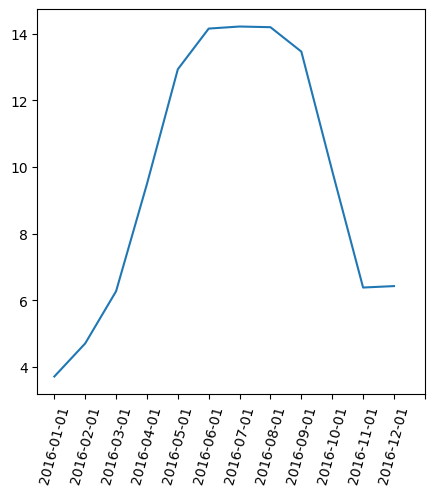

CPU times: total: 7.95 s
Wall time: 7.44 s


,predictions
2016-01-01,3.709064
2016-02-01,4.702684
2016-03-01,6.268749
2016-04-01,9.489960
2016-05-01,12.933349
2016-06-01,14.153758
2016-07-01,14.215729
2016-08-01,14.195324
2016-09-01,13.462396
2016-10-01,9.881792


In [17]:
%%time
ensemble_model.forecast(dataset, 12, fig_size = (5,5))

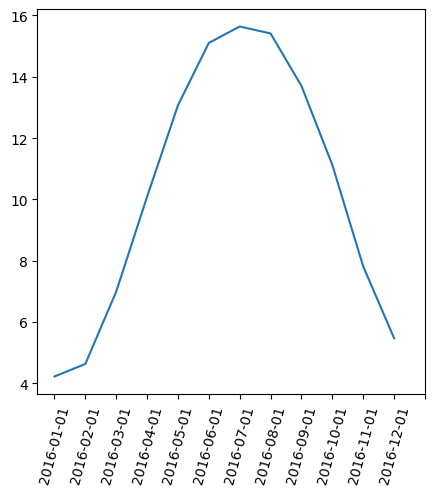

CPU times: total: 5.67 s
Wall time: 5.22 s


,predictions
2016-01-01,4.220717
2016-02-01,4.630549
2016-03-01,6.990239
2016-04-01,10.085731
2016-05-01,13.067435
2016-06-01,15.104198
2016-07-01,15.638341
2016-08-01,15.412140
2016-09-01,13.698222
2016-10-01,11.120328


In [18]:
%%time
# from statsmodels.tsa.arima.model import ARIMA
# ar = ARIMA(dataset, order = (2, 0, 1), seasonal_order = (2, 0, 1, 23))
utils.model_forecast(ar, dataset, 12, fig_size = (5,5))